In [66]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import os
import glob
import cv2

In [2]:
DATA_DIR = "D:\\Data\\Dispertech\\2020-01-27"

In [23]:
for file in glob.glob(os.path.join(DATA_DIR, '*.npy')):
    filename = file.split('\\')[-1]
    data = np.load(file)
    fig, ax = plt.subplots(figsize=(11,10), dpi=100)
    plt.imshow(data.T)
    plt.title(filename)
    plt.savefig(file+'.png')
    plt.close()

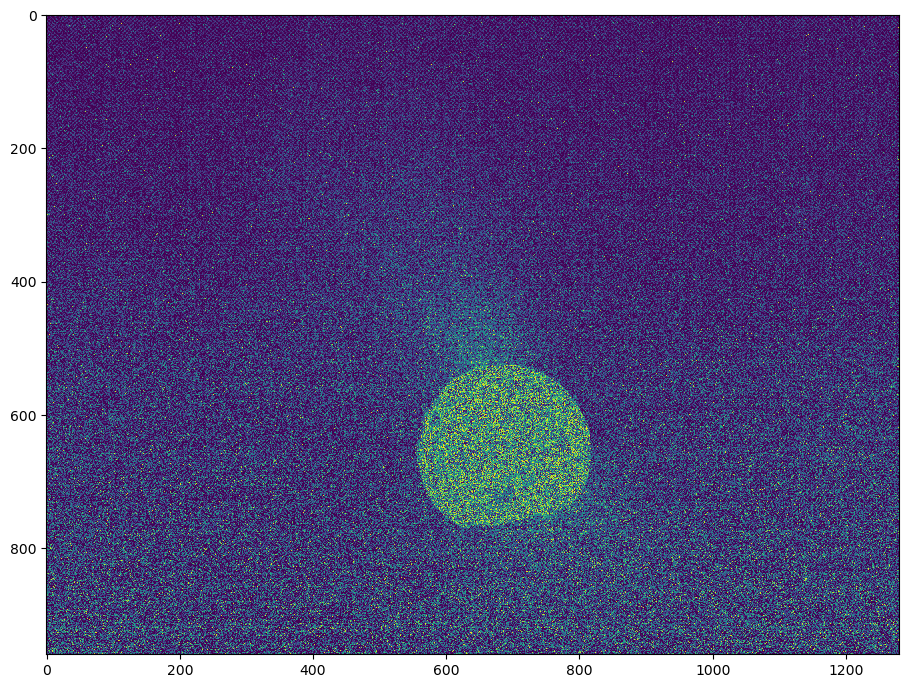

In [37]:
file = "fiber_end_1902060_0.npy"
filename = os.path.join(DATA_DIR,file)
data = np.load(os.path.join(DATA_DIR, filename)).astype(np.uint8)
# test_img = mask*np.ones(data.shape, dtype=np.uint8)*2**8
circles = cv2.HoughCircles(np.uint8(data),cv2.HOUGH_GRADIENT,10,50,param1=50,param2=30,minRadius=100,maxRadius=0)
fig, ax = plt.subplots(figsize=(11,10), dpi=100)
fig.set()
plt.imshow(data.T)

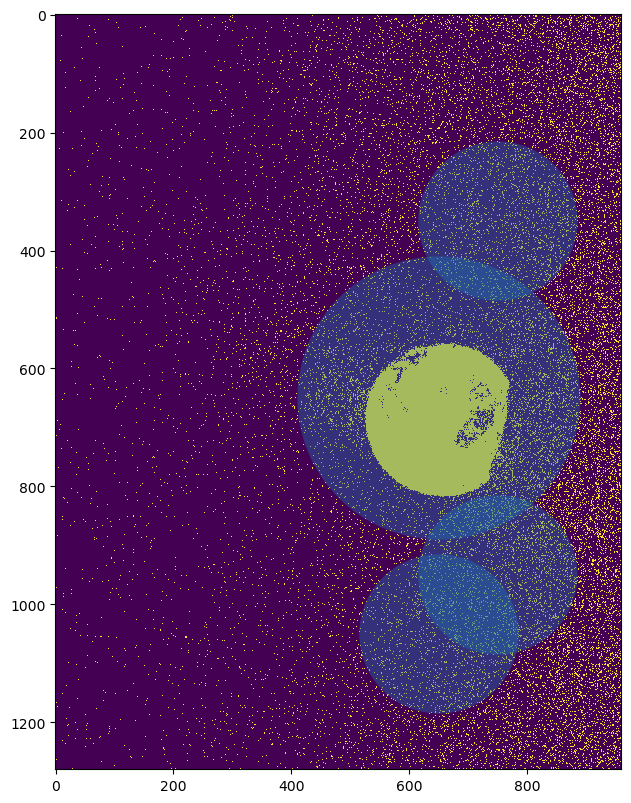

In [76]:
img = np.load(os.path.join(DATA_DIR, filename))
mask = img>130
d = np.zeros(img.shape, dtype=np.uint8)
d[mask] = 255
    
fig, ax = plt.subplots(figsize=(11,10), dpi=100)
plt.imshow(d)
circles = cv2.HoughCircles(d,cv2.HOUGH_GRADIENT,100,100,param1=50,param2=50,minRadius=100,maxRadius=300)
for c in circles[0, :]:
    circ = Circle((c[0],c[1]),c[2], alpha=0.4, facecolor=None)
    ax.add_patch(circ)

In [78]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

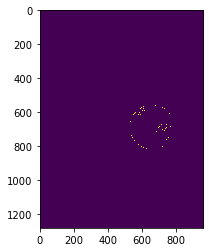

In [95]:
img = np.load(os.path.join(DATA_DIR, filename))
image = img_as_ubyte(img)
mask = img>130
d = np.zeros(img.shape, dtype=np.uint8)
d[mask] = 255

edges = canny(d, sigma=5, low_threshold=8, high_threshold=70)
plt.imshow(edges)

In [96]:
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

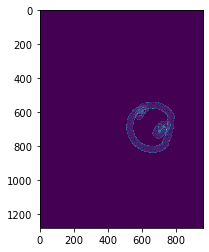

In [99]:
plt.imshow(hough_res[0])

In [100]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

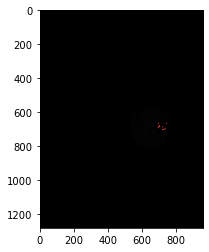

In [102]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)
ax.imshow(image, cmap=plt.cm.gray)
plt.show()